In [153]:
import pandas as pd
import numpy as np
import math
from sklearn import datasets

data = datasets.load_iris()

# Creating a pandas dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [154]:
def sortPoints(points):
    pointsMatrix = []
    for ptsList in points:
        elmt = list(ptsList)
        pointsMatrix.append(elmt)
    print(pointsMatrix)
    npPointsMatrix = np.array(pointsMatrix)
    return npPointsMatrix
    

In [155]:
# Function to find the extreme points (only leftmost and rightmost) within the dataset
def findExtremePoints(ptsMatrix):
    idxMin = 0
    idxMax = 0
    minX = ptsMatrix[0, 0]
    maxX = ptsMatrix[0, 0]
    for i in range(len(ptsMatrix)):
        if (ptsMatrix[i, 0] < minX):
            idxMin = i
            minX = ptsMatrix[i, 0]
        if (ptsMatrix[i, 0] > maxX):
            idxMax = i
            maxX = ptsMatrix[i, 0]
    return idxMin, idxMax


In [156]:
# Function to check if a point is above or below the line
def isPointAbove(a, b, c):
    # x1 -> a[0], x2 -> b[0], x3 -> c[0]
    # y1 -> a[1], y2 -> b[1], y3 -> c[1]
    #cross = ((c[1] - a[1]) * (b[0] - a[0]) - (b[1] - a[1]) * (c[0] * a[0]))
    #if (cross > 0):
    #    return True
    #else:
    #    return False

    det = a[0]*b[1] + c[0]*a[1] + b[0]*c[1] - c[0]*b[1] - b[0]*a[1] - a[0]*c[1]
    return (det > 0)

In [157]:
# Function to check if point c is inside a line between point a and point b
def isWithinLine(a, b, c):
    return (onTheSameLine(a, b, c) and (checkInclusive(a[0], c[0], b[0]) if a[0] != b[0] else checkInclusive(a[1], c[1], b[1])))

# Function to check if a, b, and c are on the same line, returns true if a, b, and c are on the same line
def onTheSameLine(a, b, c):
    return ((b[0] - a[0]) * (c[1] - a[1]) == (c[0] - a[0]) * (b[1] - a[1]))

# Function to check if b is between a and c (inclusive), returns true if b is between a and c
def checkInclusive(a, b, c):
    return (a <= b <= c or c <= b <= a)


In [158]:
# Function to find the distance from point c to a line from point a to b
def distancePointtoLine(a, b, c):
    deltaX = b[0] - a[0]
    deltaY = b[1] - a[1]
    return ((abs(deltaY * c[0] - deltaX * c[1] + b[0]*a[1] - b[1]*a[0]))/math.sqrt(deltaY**2 + deltaX**2))
    #return abs(np.cross(b-a,c-a)/np.linalg.norm(b-a))

# Function to find the angle of point c to line from point a to b
def findAngle(a, b, c):
    cos_angle = np.dot(a-c,b-c)/(np.linalg.norm(a-c) * np.linalg.norm(b-c))
    return np.arccos(cos_angle)

In [159]:
def turnArraytoMatrix(hull):
    print("Original hull:")
    print(hull)
    hullMatrix = []
    for i in range (0, len(hull), 2):
        hullElmt = []
        if (hull[i] == hull[i+1]):
            continue
        hullElmt.append(hull[i])
        hullElmt.append(hull[i+1])

        if (hullElmt in hullMatrix or np.flip(hullElmt) in hullMatrix):
            continue

        hullMatrix.append(hullElmt)
    #npHullMatrix = np.asmatrix(hullMatrix)
    #print(npHullMatrix)
    return hullMatrix

In [160]:
def findConvexHull(points, idx1, idx2, pos, hull):
    idxMaxDist = -1
    maxDist = 0
    # Iterate through all the points available within the dataset
    for i in range (len(points)):
        # Find the distance of each points to the center line
        distance = distancePointtoLine(points[idx1], points[idx2], points[i])
        # If the point we are currently scanning is on the correct position (either above or below based on pos), then set the index and max distance
        if ((isPointAbove(points[idx1], points[idx2], points[i]) == pos) and distance > maxDist):
            #print("Found points at", i)
            idxMaxDist = i
            maxDist = distance

    # If no more points are found (meaning all the points in that sector has been covered), append both edges of the line, then return the finished convex hull array
    if (idxMaxDist == -1):
        #print("yes")
        hull.append(idx1)
        hull.append(idx2)
        return hull

    findConvexHull(points, idxMaxDist, idx1, not isPointAbove(points[idxMaxDist], points[idx1], points[idx2]), hull)
    findConvexHull(points, idxMaxDist, idx2, not isPointAbove(points[idxMaxDist], points[idx2], points[idx1]), hull)


In [161]:
def myConvexHull(points):
    # Find the leftmost and rightmost points
    idxMin, idxMax = findExtremePoints(points)
    #print(idxMin, idxMax)

    # Initialize a hull array to store convex hull's points
    hull = []
    #print(idxMin,idxMax)

    # Call findConvexHull to recursively check points above the center line
    print("Scanning points above the line")
    findConvexHull(points, idxMin, idxMax, True, hull)

    # Call findConvexHull to recursively check points below the center line
    print("Scanning points below the line")
    findConvexHull(points, idxMin, idxMax, False, hull)

    hullMatrix = turnArraytoMatrix(hull)
    return hullMatrix
    # Initialize array for section s1 and s2
    s1 = []
    s2 = []

    # Initialize array to store distances from a point to the line
    s1_distances = []
    s2_distances = []

    # Initialize leftmost and rightmost points
    leftmostPts = points[idxMin]
    rightmostPts = points[idxMax]

    # Iterate through all the points within the matrix
    for i in range (len(points)):
        # If current pts is the leftmost or rightmost point, then skip it
        if ((i == idxMin) or (i == idxMax)):
            i += 1
            continue
        
        # If current pts is inside the line between leftmost and rightmost point, then skip it
        if (isWithinLine(leftmostPts, rightmostPts, points[i])):
            i += 1
            continue
        # If current pts is outside the line between leftmost and rightmost point, then it must belong to s1 or s2
        else:
            # If current pts is above the line, then append the index to s1
            if (isPointAbove(leftmostPts, rightmostPts, points[i])):
                s1.append(i)
            # If current pts is below the line, then append the index to s2
            else:
                s2.append(i)
        i += 1

    # Initialize furthest point from both s1 and s2
    d1_max = distancePointtoLine(leftmostPts, rightmostPts, points[s1[0]])
    d2_max = distancePointtoLine(leftmostPts, rightmostPts, points[s2[0]])
    #print(d2_max)

    # maxDist stores the index from either s1 or s2
    maxDist1 = 0
    maxDist2 = 0

    # Iterate through s1 to find the furthest point from the line
    for i in range (1, len(s1)):
        distance = distancePointtoLine(leftmostPts, rightmostPts, points[s1[i]])
        # If somehow there are 2 points with the same distance, find the one that creates the maximum angle towards the line
        if (distance == d1_max):
            angle = findAngle(leftmostPts, rightmostPts, points[s1[i]])
            # If angle for the current points is bigger, then pick it as the maximum candidate
            if (angle > findAngle(leftmostPts, rightmostPts, points[maxDist1])):
                d1_max = distance
                maxDist1 = s1[i]
        elif (distance > d1_max):
            d1_max = distance
            maxDist1 = s1[i]

    # Iterate through s2 to find the furthest point from the line
    for i in range (1, len(s2)):
        distance = distancePointtoLine(leftmostPts, rightmostPts, points[s2[i]])
        #print(distance)
        # If somehow there are 2 points with the same distance, find the one that creates the maximum angle towards the line
        if (distance == d2_max):
            angle = findAngle(leftmostPts, rightmostPts, points[s2[i]])
            # If angle for the current points is bigger, then pick it as the maximum candidate
            if (angle > findAngle(leftmostPts, rightmostPts, points[maxDist2])):
                d2_max = distance
                maxDist2 = s2[i]
        elif (distance > d2_max):
            d2_max = distance
            maxDist2 = s2[i]
    print(s1)
    print(s2)
    print(maxDist1)
    print(maxDist2)



    


Scanning points above the line
Scanning points below the line
Original hull:
[22, 32, 22, 13, 15, 32, 15, 15, 22, 13, 22, 32, 22, 22, 32, 15, 41, 13, 36, 41, 18, 36, 18, 14, 41, 13, 36, 41, 18, 36, 18, 14]
[[22, 32], [22, 13], [15, 32], [32, 15], [41, 13], [36, 41], [18, 36], [18, 14]]
Scanning points above the line
Scanning points below the line
Original hull:
[34, 35, 34, 7, 35, 0, 10, 18, 10, 7, 26, 18, 34, 35, 34, 7, 35, 0, 10, 18, 10, 7, 18, 26, 0, 0]
[[34, 35], [34, 7], [35, 0], [10, 18], [10, 7], [26, 18], [18, 26]]
Scanning points above the line
Scanning points below the line
Original hull:
[48, 6, 17, 48, 17, 31, 19, 18, 19, 6, 31, 18, 31, 31]
[[48, 6], [17, 48], [17, 31], [19, 18], [19, 6], [31, 18]]


C:\Users\ASUS\AppData\Local\Temp/ipykernel_4892/2047020935.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return ((abs(deltaY * c[0] - deltaX * c[1] + b[0]*a[1] - b[1]*a[0]))/math.sqrt(deltaY**2 + deltaX**2))
C:\Users\ASUS\AppData\Local\Temp/ipykernel_4892/2047020935.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return ((abs(deltaY * c[0] - deltaX * c[1] + b[0]*a[1] - b[1]*a[0]))/math.sqrt(deltaY**2 + deltaX**2))
C:\Users\ASUS\AppData\Local\Temp/ipykernel_4892/2047020935.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return ((abs(deltaY * c[0] - deltaX * c[1] + b[0]*a[1] - b[1]*a[0]))/math.sqrt(deltaY**2 + deltaX**2))


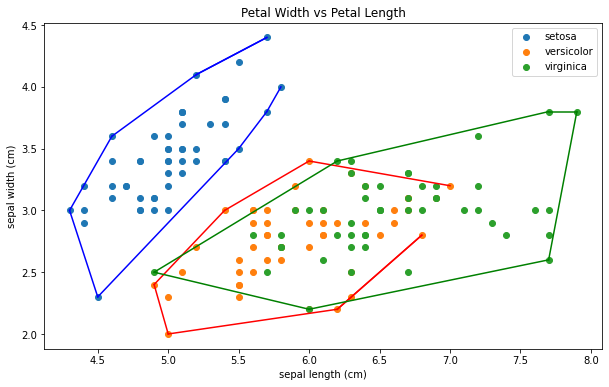

In [162]:
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull2 = myConvexHull(bucket)
    hull = ConvexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    print(hull2)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull2:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
    
    #for simplex in hull.simplices:
    #    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()